# Decision Trees Rf

Decision Tree Accuracy: 0.7132867132867133
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.68      0.67      0.67        63

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143



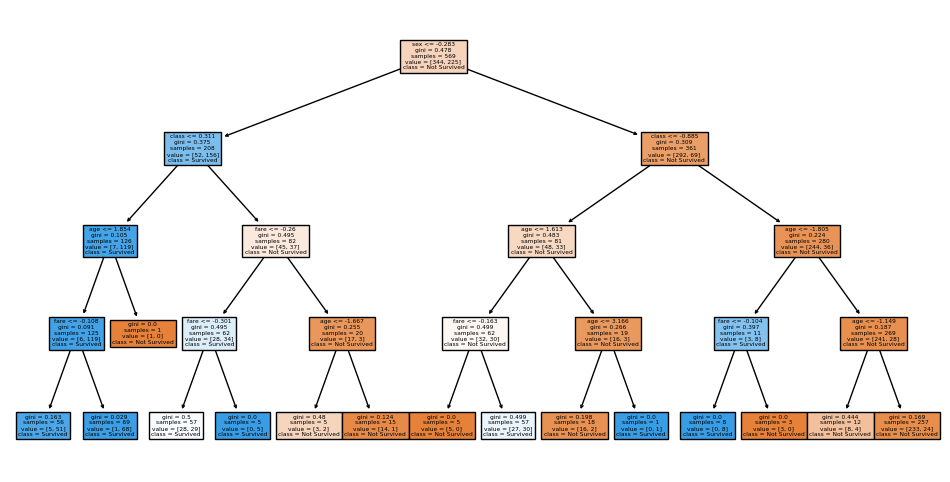

Random Forest Accuracy: 0.7622377622377622
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        80
           1       0.75      0.70      0.72        63

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143

Gradient Boosting Accuracy: 0.7762237762237763
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        80
           1       0.82      0.63      0.71        63

    accuracy                           0.78       143
   macro avg       0.79      0.76      0.77       143
weighted avg       0.78      0.78      0.77       143

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset from seaborn
data = sns.load_dataset('titanic')

# Preprocessing: Select relevant features & drop missing values
data = data[['sex', 'age', 'fare', 'class', 'embark_town', 'survived']].dropna()

# Encoding categorical variables
label_encoders = {}
for col in ['sex', 'class', 'embark_town']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Feature Scaling
scaler = StandardScaler()
X = data.drop(columns=['survived'])
X_scaled = scaler.fit_transform(X)
y = data['survived']

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt, 
          feature_names=data.drop(columns=['survived']).columns.tolist(), 
          class_names=['Not Survived', 'Survived'], 
          filled=True)
plt.show()

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Hyperparameter Tuning with GridSearchCV
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search.best_params_)

# Scikit-Learn Essentials


Scikit-Learn (`sklearn`) is a **powerful Python library for machine learning**. It provides tools for **data preprocessing, model building, evaluation, and feature selection**.

---

## **📌 1️⃣ Key Modules in Scikit-Learn**
| **Module** | **Purpose** | **Example** |
|------------|------------|-------------|
| `sklearn.model_selection` | Splitting data, cross-validation | `train_test_split()` |
| `sklearn.preprocessing` | Scaling, encoding | `StandardScaler()`, `LabelEncoder()` |
| `sklearn.linear_model` | Regression & classification | `LogisticRegression()`, `LinearRegression()` |
| `sklearn.tree` | Decision Trees | `DecisionTreeClassifier()` |
| `sklearn.ensemble` | Boosting & bagging | `RandomForestClassifier()`, `GradientBoostingClassifier()` |
| `sklearn.svm` | Support Vector Machines | `SVC()` |
| `sklearn.neighbors` | k-Nearest Neighbors (KNN) | `KNeighborsClassifier()` |
| `sklearn.metrics` | Model evaluation | `accuracy_score()`, `classification_report()` |


## **📌 2️⃣ Data Preprocessing**
Before training a model, we must **clean and transform data**.

### **👉 Encoding Categorical Data**
Convert text labels into numbers using `LabelEncoder`:
```python
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
```

### **👉 Feature Scaling**
Machine learning models work better when features are on the same scale.  
**Example: Standardizing Data (mean=0, std=1)**
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```


## **📌 3️⃣ Model Training & Evaluation**
### **👉 Splitting Data**
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### **👉 Training a Model**
Example: Decision Tree Classifier
```python
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
```

### **👉 Making Predictions**
```python
y_pred = model.predict(X_test)
```

### **👉 Evaluating Performance**
```python
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
```


## **📌 4️⃣ Working with Ensembles**
Ensembles combine multiple models for better performance.
Types of Ensemble Methods:
* Bagging (Bootstrap Aggregating)
* Boosting
* Stacking

### **👉 Random Forest (Bagging)**
Bagging reduces variance by training multiple models on different subsets of the data (with replacement). The most common bagging algorithm is Random Forest.
Random Forest:
* Trains multiple decision trees on different random subsets of the data.
* Averages the predictions for regression problems or uses majority voting for classification.
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
```

### **👉 Gradient Boosting (Boosting)**
Boosting works by training models sequentially, where each new model tries to correct the mistakes made by the previous one. The most common boosting algorithms are AdaBoost, Gradient Boosting, and XGBoost.
```python
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
```

### **👉 Stacking Classifier (Stacking)**
Stacking combines multiple models by training a meta-model on the predictions of other base models. The idea is that each base model captures different patterns, and the meta-model learns to combine their outputs to make the final prediction.
```python
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('lr', LogisticRegression())
]

# Initialize StackingClassifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the model
stacking_model.fit(X_train, y_train)
```
Why Use Ensemble Methods?
* Improved Accuracy: Combining multiple models leads to better overall performance.
* Reduced Overfitting: By averaging multiple models, ensemble methods can generalize better.
* Versatility: Can be applied to both classification and regression tasks.

Summary of Ensemble Methods:
* Bagging: Combines multiple models to reduce variance (e.g., Random Forest).
* Boosting: Combines models sequentially to reduce bias (e.g., Gradient Boosting).
* Stacking: Combines multiple base models and uses a meta-model to improve performance.

---

## **📌 5️⃣ Hyperparameter Tuning in Machine Learning**
Optimize model performance using `GridSearchCV`.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
```

## 🔍 Hyperparameter Tuning 

Hyperparameter tuning is the process of **optimizing the settings** of a machine learning model to improve its performance. These **hyperparameters** are set **before training** and affect how the model learns.


## 🚀 **1️⃣ What Are Hyperparameters?**
Hyperparameters are **not learned from data** but are set manually to control the training process.

### **Examples of Hyperparameters:**
| **Model** | **Hyperparameters** | **Description** |
|-----------|--------------------|----------------|
| **Decision Tree** | `max_depth` | Limits tree depth to prevent overfitting |
| **Random Forest** | `n_estimators` | Number of decision trees in the forest |
| **Gradient Boosting** | `learning_rate` | Step size for updating model weights |
| **Neural Networks** | `batch_size`, `epochs` | Controls training duration and batch processing |


## ⚡ **2️⃣ Why Tune Hyperparameters?**
- **Prevents overfitting & underfitting** 🚀
- **Improves accuracy & generalization** 📈
- **Optimizes model performance** 🎯


## 🛠 **3️⃣ Methods for Hyperparameter Tuning**
### **👉 1. Grid Search (`GridSearchCV`)**
- **Exhaustively searches** all possible hyperparameter combinations.
- **Best for small search spaces**.

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Load Data
X, y = load_iris(return_X_y=True)

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize Model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
```

### **👉 2. Random Search (`RandomizedSearchCV`)**
- **Randomly samples hyperparameter values** instead of testing all combinations.
- **Faster than Grid Search**.

```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define Hyperparameter Grid
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'learning_rate': np.linspace(0.01, 0.3, 5),
    'max_depth': [3, 5, 7]
}

# Initialize Model
gb = GradientBoostingClassifier(random_state=42)

# Perform Random Search
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Best Parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
```

### **👉 3. Bayesian Optimization (Advanced)**
- Uses probability models to find the best hyperparameters **efficiently**.
- **Faster than Grid & Random Search** for large datasets.

## 🎯 **4️⃣ Key Takeaways**
✅ **Hyperparameter tuning** improves model accuracy & generalization.  
✅ **Grid Search** is exhaustive but slow.  
✅ **Random Search** is faster & works well for large spaces.  
✅ **Bayesian Optimization** is advanced & efficient.  

---

## 🔍 How `random_state` Guarantees the Same Results

The `random_state` parameter ensures that the random operations in functions like `train_test_split`, `DecisionTreeClassifier`, and `RandomForestClassifier` produce the same output each time you run the code.

**1️⃣ `random_state` in `train_test_split`**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
* train_test_split randomly selects 80% of the data for training and 20% for testing.
* Without random_state, different rows would be chosen each time you run the code.
* With random_state=42, the function remembers the random selection, so the train/test split is always the same.

**2️⃣ `random_state` in `DecisionTreeClassifier`**
```python
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
```
* Decision trees randomly select features and split points when growing the tree.
* With random_state=42, the tree chooses the same splits every time.
* Without random_state, different runs might result in different trees.

**3️⃣ `random_state` in `RandomForestClassifier`**
```python
rf = RandomForestClassifier(n_estimators=100, random_state=42)
```
* A random forest builds multiple decision trees, each trained on a random subset of the data.
* The randomness comes from:
    * Bootstrapping (random sampling of training data).
    * Selecting random subsets of features at each split.
* With random_state=42, the same trees are built every time you train the model.

---


## **🔍 Summary**
✅ **Preprocessing** – Encoding & Scaling  
✅ **Model Building** – Training, Prediction, Evaluation  
✅ **Ensemble Learning** – Random Forest, Gradient Boosting  
✅ **Hyperparameter Tuning** – `GridSearchCV` 
